#Ejemplo 7: Predicción de precios de las casas
---



**Objetivo y comprensión del problema**

Este es un problema clásico de Deep Learning de predicción de los precios de las clases con el conocido dataset Boston. 

Se trata de un problema de regresión.



## Paso 1: Gestión de los datos




Para la configuración de las bibliotecas a importar, se incluye Keras.

In [2]:
from keras import models
from keras import layers


Using TensorFlow backend.


**1.1-Carga de datos**

En este caso, los datos están disponibles como un dataset de pruebas de Keras.

In [0]:
from keras.datasets import boston_housing

* Se separan los datos en entrenamiento y test. Ya vienen así preparados.

In [4]:
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()



57344/57026 [==============================] - 0s 2us/step


**1.2-Visualización de los datos**

Se puede comprobar la forma que tienen nuestros datos. En este caso,  404 instancias de entrenamiento y 102 instancias para pruebas con las siguientes dimensiones. 


1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13.  lower status of the population.



In [5]:
print(train_data.view())


[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]


* Se puede observar la forma de nuestros datos.

In [6]:
train_data.shape

(404, 13)

In [7]:
test_data.shape

(102, 13)

* El valor objetivo es "median values of owner-occupied homes, in thousands of dollars". Se muestra a continuación un ejemplo de los valores.

In [8]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

**1.3-Codificar los datos**

En este caso, se da la circunstancia que los valores de los datos tiene randos diferentes. Aunque un modelo se podría adaptar a los mismos, el proceso de aprendizaje sería más complicado y costoso. 

Por ello, se va a realizar una normalización de los datos de tal forma para cada columna de entrada se genera una nueva columna. Los nuevos valores serán iguales a la media de la columna dividad por la desviación estándar. 

Esta forma de normalización se denomina, [normalización Z](https://es.wikipedia.org/wiki/Unidad_tipificada).

La normalización Z es una transformación que se pueden hacer a los valores o puntuaciones de una distribución normal, con el propósito de analizar su distancia respecto a la media, expresándolas en unidades de desviación estándar. Un valor  Z nos indica la dirección y grado en que un valor individual obtenido se aleja de la media, en una escala de unidades de desviación estándar.

Esta función se implementa con las capacidades de numpy.

**Nota**: para la normalización se utilizan los datos de entrenamiento, no se deben utilizar valores calculados con los datos de prueba.





In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

**1.4-Seleccionar los datos**

En este caso, los datos ya están preparados y divididos apropiadamente.





## Paso 2: Arquitectura e implementación de nuestra red


1.   La entrada de nuestra red será una capa con 64 nodos y con la forma de nuestros datos.
2.   La función de activación o filtrado de esta primera capa será relu. Esta capa es "densa" o "totalmente conectada"
3.  La función de salida termina con un valor, sin activación. Cabe destacar que la función de salida termina con un **valor, es decir, es lineal no un valor de activación**. Este enfoque se suele aplicar cuando la regresión es escalar (es decir, se intenta predecir un valor continuo no una función de proabilidad).  La aplicación de una función de activación restringiría el rango que puede tomar la salida; por ejemplo, si se aplica una función de activación sigmoid a nuestra última capa, la red solo podría aprender a predecir valores entre 0 y 1. 

4. La función de pérdida será  **mse**. En cuanto a la función de pérdida, se utiliza MSE que busca  el cuadrado de la diferencia entre las predicciones y los valores objetivos, una función de pérdida ampliamente utilizada para problemas de regresión.
5. La función de optimización **rmsprop**. 
6. Métricas: en este caso se selecciona: **mae** y **acc**. También se obtiene el valor: MAE. Es simplemente el valor absoluto de la diferencia entre las predicciones y los objetivos. Por ejemplo, un MAE de 0.5 en este problema significaría que nuestras predicciones están en un promedio de $ 500.











In [0]:
network = models.Sequential()
network.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1))



In [0]:
network.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Paso 3:  Entrenamiento y Paso 4: Test



En este caso el entrenamiento se realiza con validación cruzada con un K=4, es decir, los datos se dividen en 4 grupos y se van utilizando iterativamente.

In [13]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('Procesando #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    # Train the model (in silent mode, verbose=0)
    network.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = network.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Procesando # 0
Instructions for updating:
Use tf.cast instead.
Procesando # 1
Procesando # 2
Procesando # 3


In [14]:
np.mean(all_scores)

19806.97173069963

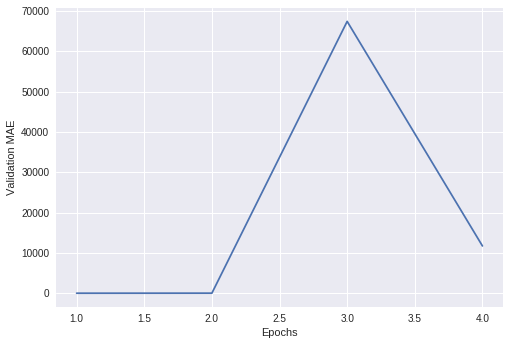

In [15]:
import matplotlib.pyplot as plt

average_mae_history = all_scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Paso 4:  Test y Predicción

Ver paso anterior.



#Tareas

1.   Cambiar el número de epochs.
2.   Cambiar la función de optimización y ver cómo afecta al resultado.
3.   Cambiar la toplogía de la red.

#Otras referencias

* https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.7-predicting-house-prices.ipynb